In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
print('\n ### train 데이터 정보 ###  \n')
print(titanic_df.info())


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


In [4]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
B96 B98          4
G6               4
C23 C25 C27      4
E101             3
              ... 
D37              1
D50              1
A5               1
C103             1
A34              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [5]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [6]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

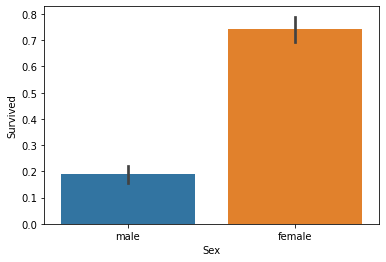

In [7]:
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

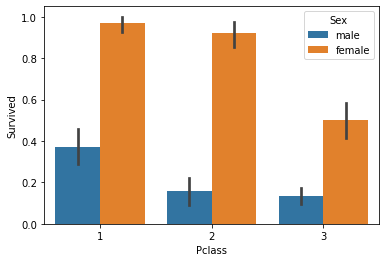

In [8]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

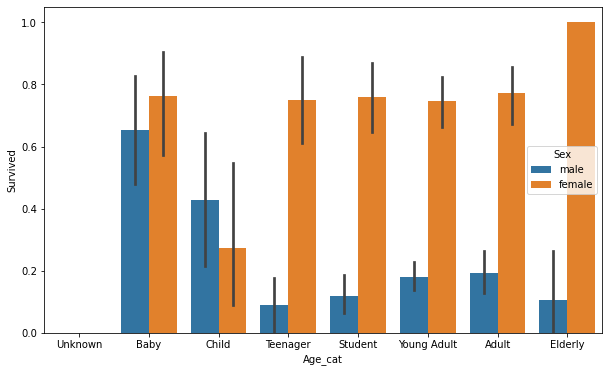

In [9]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [10]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [11]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [12]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()
svm_svc = SVC() ##추가해보자.!!

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


# SVM 학습/예측/평가
svm_svc.fit(X_train , y_train)
svm_pred = lr_clf.predict(X_test)
print('SVM 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8492
SVM 정확도: 0.8492


/Users/gim-yongbeom/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# 모델을 선택할 순간에 사용하는 라이브러리
from sklearn.model_selection import KFold

In [35]:
# 5번만 돌려보기
kfold = KFold(n_splits=5)

In [36]:
for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    print(iter_count)

0
1
2
3
4


In [37]:
X_titanic_df.shape

(891, 8)

In [38]:
X_titanic_df.iloc[:179]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
174,1,1,56.000000,0,0,30.6958,0,0
175,3,1,18.000000,1,1,7.8542,7,3
176,3,1,29.699118,3,1,25.4667,7,3
177,1,0,50.000000,0,0,28.7125,2,0


In [39]:
X_titanic_df.iloc[179:]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
179,3,1,36.000000,0,0,0.0000,7,3
180,3,0,29.699118,8,2,69.5500,7,3
181,2,1,29.699118,0,0,15.0500,7,0
182,3,1,9.000000,4,2,31.3875,7,3
183,2,1,1.000000,2,1,39.0000,5,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [42]:
for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    print(iter_count)
    print('------------------')
    print(train_index)

0
------------------
[179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340
 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358
 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376
 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394
 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412
 413 414 415 416 417 418 419 4

In [43]:
X_titanic_df.values[train_index]

array([[ 3.        ,  1.        , 22.        , ...,  7.25      ,
         7.        ,  3.        ],
       [ 1.        ,  0.        , 38.        , ..., 71.2833    ,
         2.        ,  0.        ],
       [ 3.        ,  0.        , 26.        , ...,  7.925     ,
         7.        ,  3.        ],
       ...,
       [ 1.        ,  0.        , 24.        , ..., 49.5042    ,
         2.        ,  0.        ],
       [ 1.        ,  1.        , 29.69911765, ..., 26.55      ,
         2.        ,  3.        ],
       [ 1.        ,  1.        , 48.        , ..., 52.        ,
         2.        ,  3.        ]])

In [103]:
def exec_kfold(clf, folds = 5):
    kfold = KFold(n_splits=folds)
    scores = []
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("{0}, 정확도: {1:.4f}".format(iter_count,accuracy))
    mean_score = np.mean(scores)
    print('평균 정확도: {0:.4f}'.format(mean_score))
    return mean_score

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
knn = KNeighborsClassifier(n_neighbors=5)
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

In [104]:
all_result = []

In [106]:
dt_result = exec_kfold(dt_clf, folds=5)
dt_result
all_result.append(dt_result)

0, 정확도: 0.7542
1, 정확도: 0.7809
2, 정확도: 0.7865
3, 정확도: 0.7697
4, 정확도: 0.8202
평균 정확도: 0.7823


In [107]:
svm_result10 = exec_kfold(rf_clf, folds=10)
svm_result10
all_result.append(svm_result10)

0, 정확도: 0.7778
1, 정확도: 0.7865
2, 정확도: 0.7753
3, 정확도: 0.8202
4, 정확도: 0.8315
5, 정확도: 0.8202
6, 정확도: 0.7865
7, 정확도: 0.7865
8, 정확도: 0.8764
9, 정확도: 0.8539
평균 정확도: 0.8115


In [109]:
knn_result10 = exec_kfold(knn, folds=10)
knn_result10
all_result.append(knn_result10)

0, 정확도: 0.6667
1, 정확도: 0.6742
2, 정확도: 0.7303
3, 정확도: 0.6742
4, 정확도: 0.6854
5, 정확도: 0.7191
6, 정확도: 0.7303
7, 정확도: 0.7303
8, 정확도: 0.7079
9, 정확도: 0.7865
평균 정확도: 0.7105


In [111]:
lr_clf_result10 = exec_kfold(lr_clf, folds=10)
lr_clf_result10
all_result.append(lr_clf_result10)

/Users/gim-yongbeom/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gim-yongbeom/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

0, 정확도: 0.8000
1, 정확도: 0.8090
2, 정확도: 0.7753
3, 정확도: 0.7865
4, 정확도: 0.7865
5, 정확도: 0.7640
6, 정확도: 0.7528
7, 정확도: 0.7753
8, 정확도: 0.8315
9, 정확도: 0.8090
평균 정확도: 0.7890


/Users/gim-yongbeom/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gim-yongbeom/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [112]:
len(all_result)

4

In [113]:
def all_max(all_list):
    print(all_list)
    max_value = 0
    for model_result in all_list:
        if(model_result>max_value):
            max_value = model_result
        print('현재까지의 max값 >> ', max_value)
    return max_value

In [114]:
all_max(all_result)

[0.782298662984119, 0.8114856429463171, 0.7104868913857678, 0.7889887640449438]
현재까지의 max값 >>  0.782298662984119
현재까지의 max값 >>  0.8114856429463171
현재까지의 max값 >>  0.8114856429463171
현재까지의 max값 >>  0.8114856429463171


0.8114856429463171

In [115]:
def all_max2(all_list):
    max_value = 0
    index = 0
    for i, model_result in enumerate(all_list):
        if(model_result>max_value):
            max_value = model_result
            index = i
        print('현재까지의 max값 >> ', max_value)
    return max_value, index

In [119]:
max_result2 = all_max2(all_result)
print(max_result2)

현재까지의 max값 >>  0.782298662984119
현재까지의 max값 >>  0.8114856429463171
현재까지의 max값 >>  0.8114856429463171
현재까지의 max값 >>  0.8114856429463171
(0.8114856429463171, 1)


In [126]:
max_result2[0]

0.8114856429463171

In [123]:
model_list = ['decision tree','random forest','knn','svm10']

In [124]:
print('최적의 모델은', model_list[max_result2[1]])

최적의 모델은 random forest


In [142]:
def callKFold_all(all_list):
    model_list = ['decision tree','random forest','knn','svm10']
    max_result2 = all_max2(all_list)
    print('최적의 모델은 {0}, 최대 accuracy는 {1}'.format(model_list[max_result2[1]],max_result2[0]))

In [143]:
callKFold_all(all_result)

현재까지의 max값 >>  0.782298662984119
현재까지의 max값 >>  0.8114856429463171
현재까지의 max값 >>  0.8114856429463171
현재까지의 max값 >>  0.8114856429463171
최적의 모델은 random forest, 최대 accuracy는 0.8114856429463171
